# UAS Praktikum Data Science
**No Kelompok:** 02

**Nama Anggota:** - Samuel Sinambela
                  - Samuel Sitorus
                  - Andika P Tampubolon
                  - Restu Simangunsong
                  - Elisabeth Pasaribu
                  - Imel Sinaga


**Kelas: 43 TRPL**

# 📦 — Persiapan Awal & Import Library

In [1]:
# ==========================================
# Bagian: Dataset
# Keterangan:
# - Mengimpor library utama untuk analisis data, visualisasi, dan statistik.
# - Langkah awal sebelum membaca dan memproses dataset.
# ==========================================

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import warnings
warnings.filterwarnings('ignore')

# 📂 —  Bagian 1: Data Collection(Pembacaan Dataset)

In [2]:
# Keterangan:
# - Membaca dataset Airbnb dari sumber Kaggle.
# - Dataset berisi data listing (harga, lokasi, tipe kamar, dll).
# - Verifikasi jumlah baris dan kolom untuk memastikan sesuai syarat (≥2000 baris, ≥20 fitur).
data = pd.read_csv("Pola Belanja Online Dataset.csv", low_memory=False)

# Bagian 1 :Data Collection | Data Understanding

In [3]:
# Keterangan:
# - Menampilkan 5 data teratas untuk melihat struktur dataset.
# - Memastikan fitur sesuai konteks analisis (price, room_type, dll).
data.head()

,Nama,usia,jenis_kelamin,status_pekerjaan,sumber_pendapatan,pendapatan_bulanan,frekuensi_belanja_online,nilai_transaksi_online,platform_ecommerce,kategori_barang,...,tingkat_impulsif,orientasi_review,pengeluaran_bulanan,kecenderungan_menunda,alasan_belanja_online,sensitivitas_harga,3_pertimbangan_checkout,persepsi_harga_online,dampak_tabungan,Column 24
0,Nicolaus Fidal Diaz Manurung,20,Laki-laki,Mahasiswa,Uang Saku dari Orang Tua,2000000,5,70000,Shopee,Fashion (Pakaian/Sepatu),...,1,Sangat Setuju,350000,Sering,"Harga lebih murah, Banyak pilihan produk, Prom...",Netral,"Harga/Diskon, Ulasan/Rating, Brand/Merek",Setuju,Sangat tidak setuju,NaN
1,Zanter Siallagan,23,Laki-laki,Mahasiswa,Uang Saku dari Orang Tua,2000000,4,120000,Tokopedia,Fashion (Pakaian/Sepatu),...,3,Sangat Setuju,480000,Sering,Pengiriman cepat,Sangat Tidak Setuju,"Harga/Diskon, Ulasan/Rating, Gratis Ongkir",Setuju,Sangat Setuju,NaN
2,Gilbert Devinoranda Panjaitan,23,Laki-laki,Mahasiswa,Gaji/Penghasilan Sendiri,3960000,5,Rp.110000,Blibli,Kesehatan,...,3,Netral,550000,Kadang-kadang,Harga lebih murah,Setuju,"Ulasan/Rating, Harga/Diskon, Kecepatan Pengiriman",Setuju,Sangat Setuju,NaN
3,Gilbert Devinoranda Panjaitan,23 Tahun,Laki-laki,Mahasiswa,Gaji/Penghasilan Sendiri,3960000,5,110000,Blibli,Kesehatan,...,3,Netral,550000,Kadang-kadang,Harga lebih murah,Setuju,"Ulasan/Rating, Harga/Diskon, Kecepatan Pengiriman",Setuju,Sangat Setuju,NaN
4,Teresya Martalena Tambunan,24,Perempuan,Karyawan,Gaji/Penghasilan Sendiri,1500000,5,150000,Blibli,Kesehatan,...,4,Netral,750000,Tidak Pernah,Harga lebih murah,Setuju,"Ulasan/Rating, Harga/Diskon, Kecepatan Pengiriman",Setuju,Sangat Setuju,NaN


In [4]:
print(data.columns)

Index(['Nama', 'usia', 'jenis_kelamin', 'status_pekerjaan',
       'sumber_pendapatan', 'pendapatan_bulanan', 'frekuensi_belanja_online',
       'nilai_transaksi_online', 'platform_ecommerce', 'kategori_barang',
       'metode_pembayaran', 'event_belanja', 'sumber_informasi',
       'tingkat_impulsif', 'orientasi_review', 'pengeluaran_bulanan',
       'kecenderungan_menunda', 'alasan_belanja_online', 'sensitivitas_harga',
       '3_pertimbangan_checkout', 'persepsi_harga_online', 'dampak_tabungan',
       'Column 24'],
      dtype='object')


In [5]:
# Keterangan:
# - Menampilkan kolom kolom yang ada pada data
data.columns

Index(['Nama', 'usia', 'jenis_kelamin', 'status_pekerjaan',
       'sumber_pendapatan', 'pendapatan_bulanan', 'frekuensi_belanja_online',
       'nilai_transaksi_online', 'platform_ecommerce', 'kategori_barang',
       'metode_pembayaran', 'event_belanja', 'sumber_informasi',
       'tingkat_impulsif', 'orientasi_review', 'pengeluaran_bulanan',
       'kecenderungan_menunda', 'alasan_belanja_online', 'sensitivitas_harga',
       '3_pertimbangan_checkout', 'persepsi_harga_online', 'dampak_tabungan',
       'Column 24'],
      dtype='object')

In [6]:
# Keterangan:
# - Menampilkan tipe data, jumlah nilai non-null, dan tipe fitur.
# - Digunakan untuk menentukan langkah preprocessing berikutnya.
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2198 entries, 0 to 2197
Data columns (total 23 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Nama                      2198 non-null   object 
 1   usia                      2198 non-null   object 
 2   jenis_kelamin             2198 non-null   object 
 3   status_pekerjaan          2198 non-null   object 
 4   sumber_pendapatan         2198 non-null   object 
 5   pendapatan_bulanan        2198 non-null   int64  
 6   frekuensi_belanja_online  2198 non-null   int64  
 7   nilai_transaksi_online    2198 non-null   object 
 8   platform_ecommerce        2198 non-null   object 
 9   kategori_barang           2197 non-null   object 
 10  metode_pembayaran         2198 non-null   object 
 11  event_belanja             2198 non-null   object 
 12  sumber_informasi          2198 non-null   object 
 13  tingkat_impulsif          2198 non-null   int64  
 14  orientas

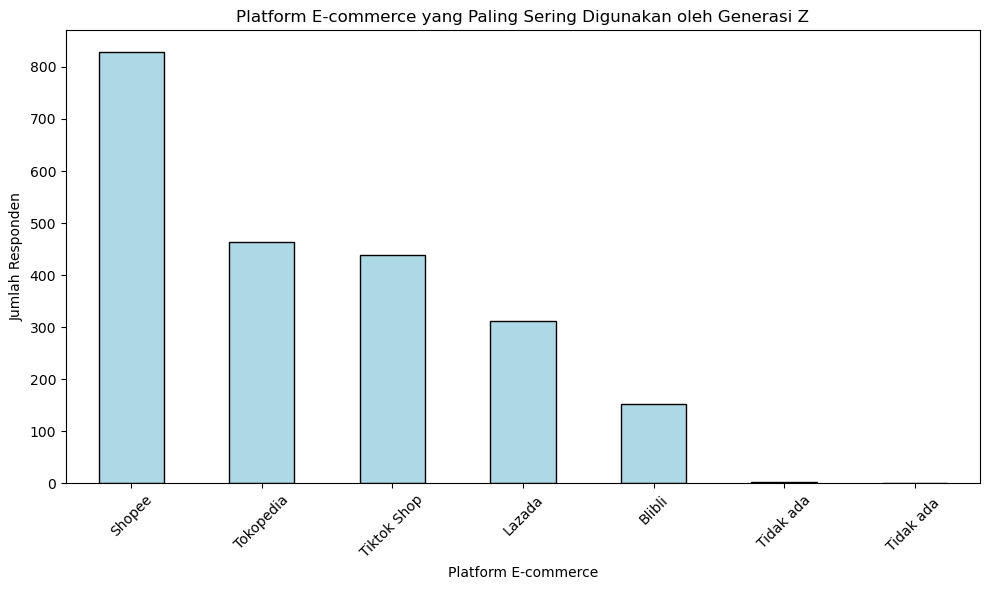

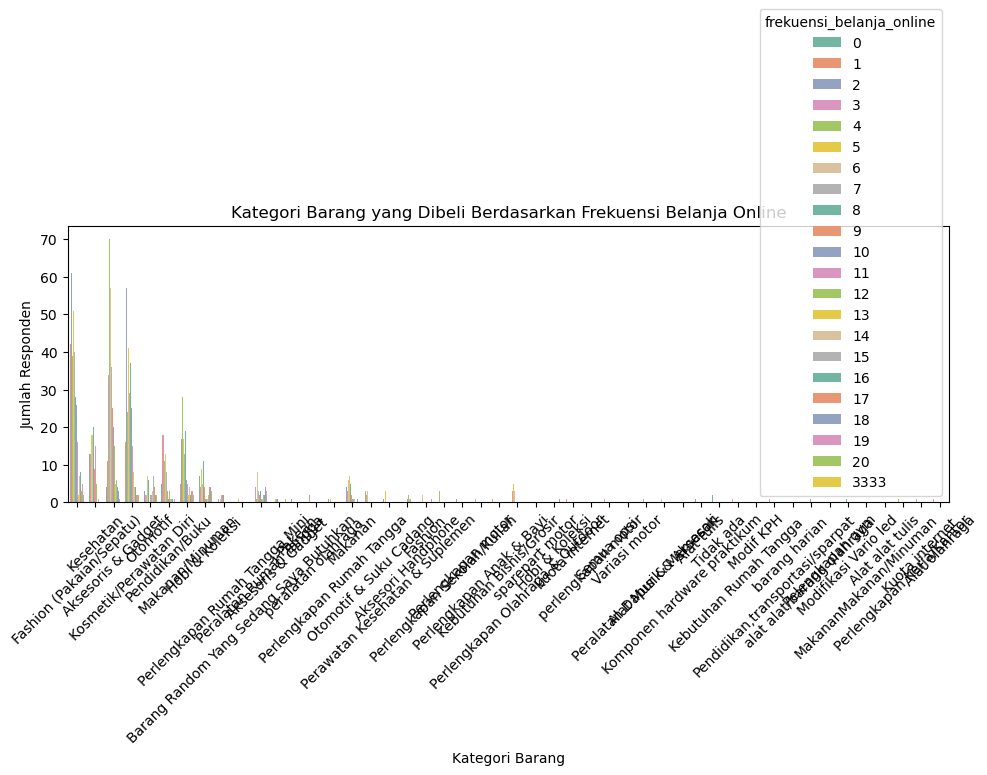

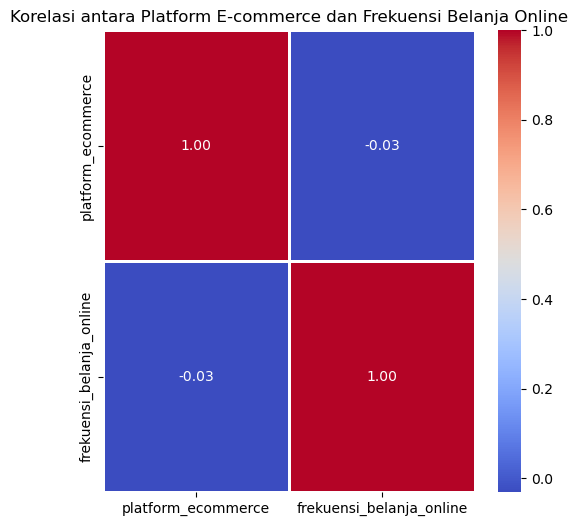

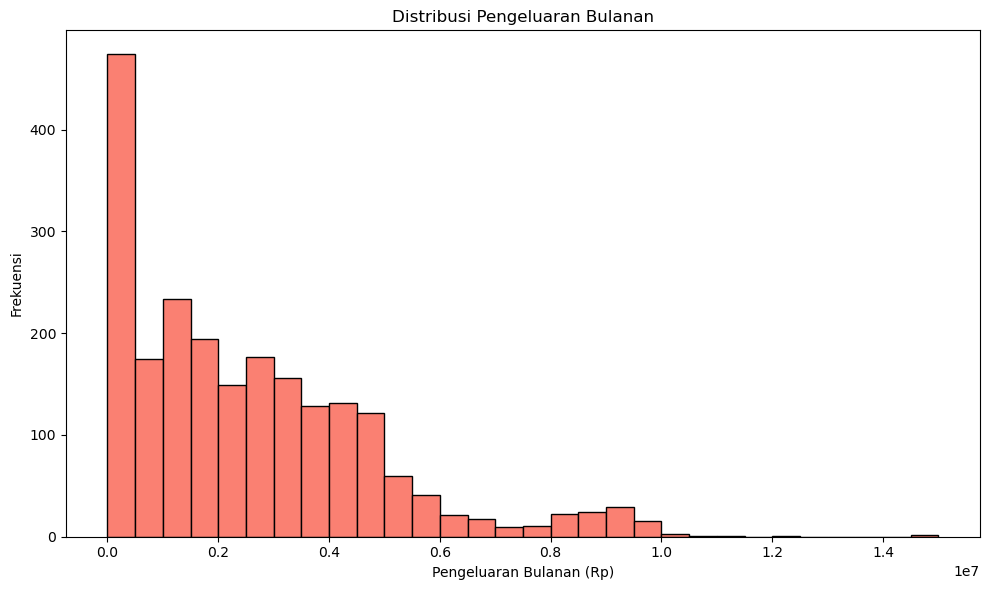

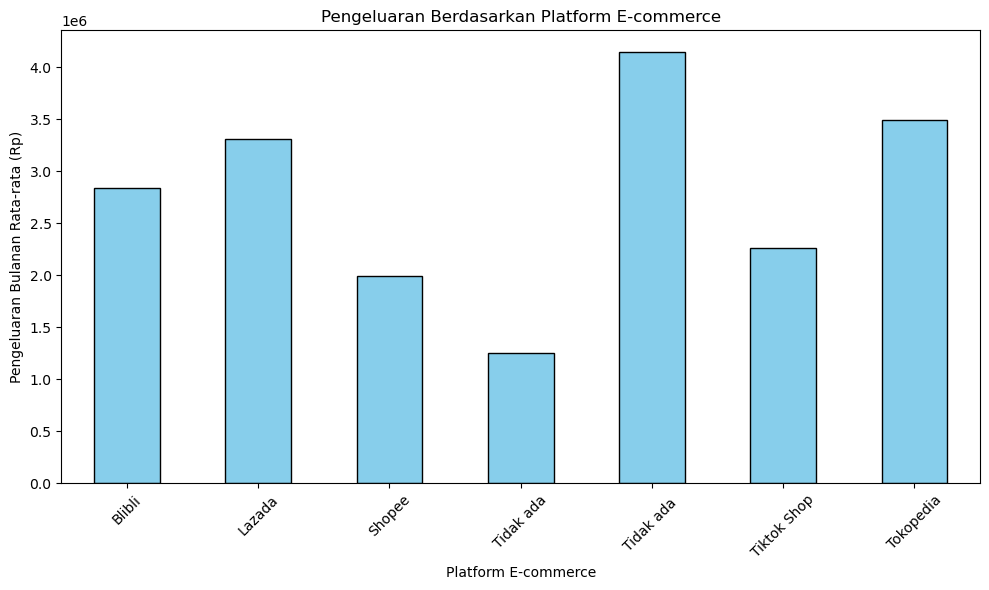

Informasi Data: 
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2198 entries, 0 to 2197
Data columns (total 23 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Nama                      2198 non-null   object 
 1   usia                      2198 non-null   object 
 2   jenis_kelamin             2198 non-null   object 
 3   status_pekerjaan          2198 non-null   object 
 4   sumber_pendapatan         2198 non-null   object 
 5   pendapatan_bulanan        2198 non-null   int64  
 6   frekuensi_belanja_online  2198 non-null   int64  
 7   nilai_transaksi_online    2198 non-null   object 
 8   platform_ecommerce        2198 non-null   object 
 9   kategori_barang           2197 non-null   object 
 10  metode_pembayaran         2198 non-null   object 
 11  event_belanja             2198 non-null   object 
 12  sumber_informasi          2198 non-null   object 
 13  tingkat_impulsif          2198 non-null   int6

In [7]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Membaca data
data = pd.read_csv("Pola Belanja Online Dataset.csv", low_memory=False)

# Membersihkan nama kolom dari spasi yang tidak diinginkan
data.columns = data.columns.str.strip()

# ================================================
# 1. Visualisasi Pola Belanja Online
# ================================================

# A. Bar Chart: Platform E-commerce yang Paling Sering Digunakan
plt.figure(figsize=(10, 6))
platform_counts = data['platform_ecommerce'].value_counts()
platform_counts.plot(kind='bar', color='lightblue', edgecolor='black')
plt.title("Platform E-commerce yang Paling Sering Digunakan oleh Generasi Z")
plt.xlabel("Platform E-commerce")
plt.ylabel("Jumlah Responden")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# B. Stacked Bar Chart: Kategori Barang yang Dibeli Berdasarkan Frekuensi
plt.figure(figsize=(10, 6))
sns.countplot(data=data, x='kategori_barang', hue='frekuensi_belanja_online', palette='Set2')
plt.title("Kategori Barang yang Dibeli Berdasarkan Frekuensi Belanja Online")
plt.xlabel("Kategori Barang")
plt.ylabel("Jumlah Responden")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# C. Heatmap: Korelasi Frekuensi Belanja dengan Platform yang Digunakan
platform_ecommerce_encoded = data['platform_ecommerce'].astype('category').cat.codes
frekuensi_belanja_encoded = data['frekuensi_belanja_online']

correlation_matrix = pd.DataFrame({'platform_ecommerce': platform_ecommerce_encoded, 
                                   'frekuensi_belanja_online': frekuensi_belanja_encoded})

plt.figure(figsize=(6, 6))
sns.heatmap(correlation_matrix.corr(), annot=True, cmap='coolwarm', fmt='.2f', linewidths=1)
plt.title("Korelasi antara Platform E-commerce dan Frekuensi Belanja Online")
plt.show()

# ================================================
# 2. Visualisasi Pengeluaran
# ================================================


# B. Histogram: Distribusi Pengeluaran Bulanan
plt.figure(figsize=(10, 6))
data['pengeluaran_bulanan'].plot(kind='hist', bins=30, color='salmon', edgecolor='black')
plt.title("Distribusi Pengeluaran Bulanan")
plt.xlabel("Pengeluaran Bulanan (Rp)")
plt.ylabel("Frekuensi")
plt.tight_layout()
plt.show()

# C. Bar Chart: Pengeluaran Berdasarkan Platform E-commerce
plt.figure(figsize=(10, 6))
avg_pengeluaran_platform = data.groupby('platform_ecommerce')['pengeluaran_bulanan'].mean()
avg_pengeluaran_platform.plot(kind='bar', color='skyblue', edgecolor='black')
plt.title("Pengeluaran Berdasarkan Platform E-commerce")
plt.xlabel("Platform E-commerce")
plt.ylabel("Pengeluaran Bulanan Rata-rata (Rp)")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# ================================================
# Statistik Deskriptif
# ================================================
# Menampilkan info mengenai dataset sebelum preprocessing
print("Informasi Data: ")
print(data.info())

# Menampilkan statistik deskriptif (mean, std, min, max, etc.)
print("\nStatistik Deskriptif Data: ")
print(data.describe())


# 📂 —  Bagian 2: Data Processing

In [8]:
# Keterangan:
# - Langkah awal pembersihan data untuk menghindari atribut ganda yang tidak relevan.
"===========1. Delete redundant data============"

'===========1. Delete redundant data============'

In [9]:
# Menampilkan keseluruhan
data.columns

Index(['Nama', 'usia', 'jenis_kelamin', 'status_pekerjaan',
       'sumber_pendapatan', 'pendapatan_bulanan', 'frekuensi_belanja_online',
       'nilai_transaksi_online', 'platform_ecommerce', 'kategori_barang',
       'metode_pembayaran', 'event_belanja', 'sumber_informasi',
       'tingkat_impulsif', 'orientasi_review', 'pengeluaran_bulanan',
       'kecenderungan_menunda', 'alasan_belanja_online', 'sensitivitas_harga',
       '3_pertimbangan_checkout', 'persepsi_harga_online', 'dampak_tabungan',
       'Column 24'],
      dtype='object')

In [10]:
# Mengecek apakah ada duplikasi data
duplicates_check = data.duplicated()

# Menampilkan jumlah baris yang duplikat
duplicates_check_sum = duplicates_check.sum()

# Menampilkan baris yang duplikat (jika ada)
duplicates_rows = data[duplicates_check]

# Menampilkan hasil
print("Jumlah baris duplikat:", duplicates_check_sum)
print("Baris yang duplikat (jika ada):")
print(duplicates_rows)

data_no_duplicates = data.drop_duplicates()


Jumlah baris duplikat: 9
Baris yang duplikat (jika ada):
                   Nama usia jenis_kelamin status_pekerjaan  \
201                Tora   24     Laki-laki       Wiraswasta   
202                Tora   24     Laki-laki       Wiraswasta   
337              Toni T   20     Laki-laki        Mahasiswa   
338              Toni T   20     Laki-laki        Mahasiswa   
537                Zaki   25     Laki-laki       Freelancer   
640        Yuda Sitorus   19     Laki-laki        Mahasiswa   
675      Zahra Tambunan   21     Perempuan         Karyawan   
1020     Rio Herlambang   19     Laki-laki        Mahasiswa   
1094  RIDWAN AL BUSTOMI   21     Laki-laki        Mahasiswa   

             sumber_pendapatan  pendapatan_bulanan  frekuensi_belanja_online  \
201          Keuntungan Bisnis             9480000                         5   
202          Keuntungan Bisnis             9480000                         5   
337   Uang Saku dari Orang Tua             2000000                      

In [11]:
# Mengecek missing values pada setiap kolom
missing_values = data_no_duplicates.isnull().sum()

# Menampilkan jumlah missing values per kolom
print("Jumlah missing values per kolom:")
print(missing_values)

# Menampilkan persentase missing values per kolom
missing_values_percentage = (missing_values / len(data)) * 100
print("\nPersentase missing values per kolom:")
print(missing_values_percentage)

# Menampilkan baris yang memiliki missing values
data_with_missing_values = data_no_duplicates[data_no_duplicates.isnull().any(axis=1)]
print("\nData dengan missing values:")
print(data_with_missing_values.head())

# Mengisi missing values untuk kolom numerik dengan median dan untuk kolom kategori dengan modus
def fill_missing_values(df):
    for column in df.columns:
        if df[column].dtype in ['float64', 'int64']:  # Cek kolom numerik
            df[column] = df[column].fillna(df[column].median())  # Isi dengan median
        else:  # Cek kolom kategori atau teks
            df[column] = df[column].fillna(df[column].mode()[0])  # Isi dengan modus
    return df

# Mengisi missing values pada data_no_duplicates
data_no_missing = fill_missing_values(data_no_duplicates)

# Menampilkan hasil setelah mengisi missing values
print("Dataset setelah mengisi missing values:")
print(data_no_missing.head())



Jumlah missing values per kolom:
Nama                           0
usia                           0
jenis_kelamin                  0
status_pekerjaan               0
sumber_pendapatan              0
pendapatan_bulanan             0
frekuensi_belanja_online       0
nilai_transaksi_online         0
platform_ecommerce             0
kategori_barang                1
metode_pembayaran              0
event_belanja                  0
sumber_informasi               0
tingkat_impulsif               0
orientasi_review               0
pengeluaran_bulanan            0
kecenderungan_menunda          0
alasan_belanja_online          0
sensitivitas_harga             0
3_pertimbangan_checkout        0
persepsi_harga_online          0
dampak_tabungan                0
Column 24                   2189
dtype: int64

Persentase missing values per kolom:
Nama                         0.000000
usia                         0.000000
jenis_kelamin                0.000000
status_pekerjaan             0.000000
sumbe

In [12]:
def standardize_age(value):
    if isinstance(value, str):
        value = value.replace("Tahun", "").replace("tahun", "").strip()  # Menghapus kata 'Tahun' atau 'tahun'
    return pd.to_numeric(value, errors='coerce')  # Mengonversi ke angka

# Fungsi untuk menghapus simbol 'Rp', koma, titik dan mengonversi string ke angka
def standardize_currency(value):
    if isinstance(value, str):
        value = value.replace("Rp", "").replace(",", "").replace(".", "").strip()  # Menghapus simbol 'Rp', koma, dan titik
    return pd.to_numeric(value, errors='coerce')  # Mengonversi ke angka

# Standarisasi kolom Usia dengan memastikan format numerik
data_no_missing['usia'] = data_no_missing['usia'].apply(standardize_age)

# Standarisasi kolom Pengeluaran Bulanan dan Nilai Transaksi Online dengan memastikan format numerik
data_no_missing['Pengeluaran_Bulanan'] = data_no_missing['pengeluaran_bulanan'].apply(standardize_currency)
data_no_missing['Nilai_Transaksi_Online'] = data_no_missing['nilai_transaksi_online'].apply(standardize_currency)

# Standarisasi kolom "Dalam 1 bulan, rata-rata berapa kali Anda melakukan transaksi Belanja Online"
data_no_missing['Transaksi_Belanja_Online'] = data_no_missing['frekuensi_belanja_online'].apply(pd.to_numeric, errors='coerce')


Data yang terdeteksi sebagai outlier:
    Transaksi_Belanja_Online
60                      3333


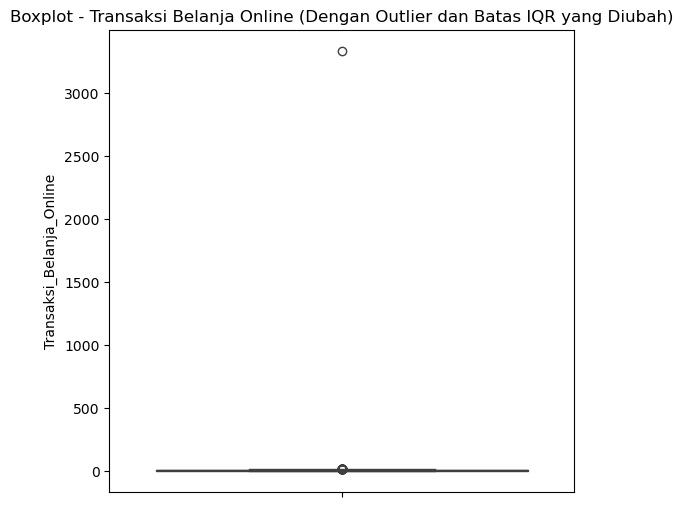

In [13]:
# Fungsi untuk mendeteksi outlier menggunakan IQR dengan pengali lebih besar
def detect_outliers_iqr(column, multiplier=10):
    Q1 = column.quantile(0.25)
    Q3 = column.quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - multiplier * IQR
    upper_bound = Q3 + multiplier * IQR
    return lower_bound, upper_bound

# Deteksi outlier pada kolom "Transaksi_Belanja_Online" dengan pengali IQR yang lebih besar
lower, upper = detect_outliers_iqr(data_no_missing['Transaksi_Belanja_Online'], multiplier=10)

# Menyimpan data yang terdeteksi sebagai outlier
outliers_data = data_no_missing[(data_no_missing['Transaksi_Belanja_Online'] < lower) | (data_no_missing['Transaksi_Belanja_Online'] > upper)]

# Menampilkan data yang terdeteksi sebagai outlier
print("Data yang terdeteksi sebagai outlier:")
print(outliers_data[['Transaksi_Belanja_Online']])

# Visualisasi Boxplot untuk kolom "Transaksi_Belanja_Online" dengan pengaturan skala lebih baik
plt.figure(figsize=(6, 6))
sns.boxplot(data_no_missing['Transaksi_Belanja_Online'])
plt.title("Boxplot - Transaksi Belanja Online (Dengan Outlier dan Batas IQR yang Diubah)")
plt.show()


In [14]:
data_no_outliers = data_no_missing.copy()

# Mengganti nilai outlier dengan nilai median
median_value = data_no_outliers['Transaksi_Belanja_Online'].median()

# Mengganti nilai yang lebih kecil dari batas bawah atau lebih besar dari batas atas dengan median
data_no_outliers['Transaksi_Belanja_Online'] = data_no_outliers['Transaksi_Belanja_Online'].apply(
    lambda x: median_value if x < lower or x > upper else x
)

# Menampilkan data setelah mengganti outlier dengan median
print(data_no_outliers[['Transaksi_Belanja_Online']].head())


   Transaksi_Belanja_Online
0                       5.0
1                       4.0
2                       5.0
3                       5.0
4                       5.0


In [15]:
output_file_path = 'data_cleaned.csv'
data_no_outliers.to_csv(output_file_path, index=False)

# Menampilkan pesan bahwa file telah berhasil disimpan
print(f"Dataset yang telah dibersihkan telah disimpan di: {output_file_path}")

Dataset yang telah dibersihkan telah disimpan di: data_cleaned.csv


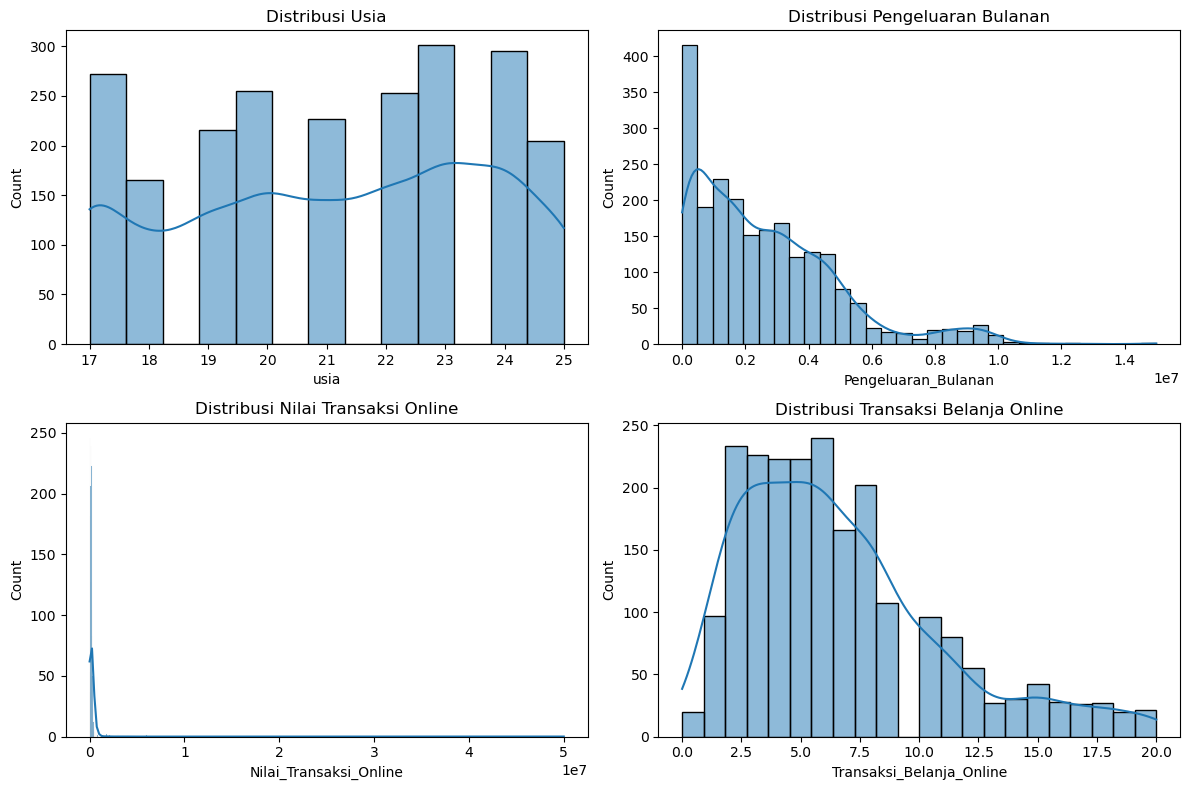

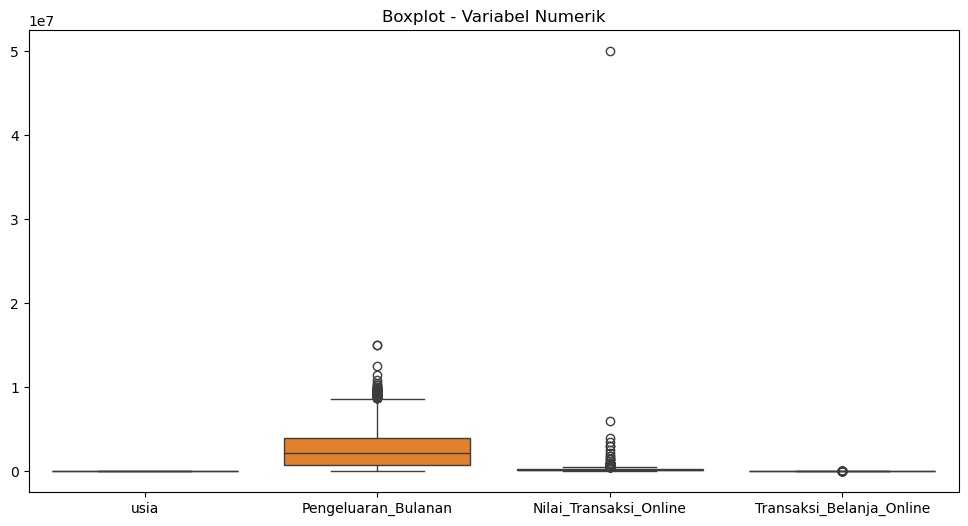

In [16]:
# Memvisualisasikan distribusi data untuk kolom numerik
plt.figure(figsize=(12, 8))

# Histogram untuk variabel numerik
plt.subplot(2, 2, 1)
sns.histplot(data_no_outliers['usia'], kde=True)
plt.title("Distribusi Usia")

plt.subplot(2, 2, 2)
sns.histplot(data_no_outliers['Pengeluaran_Bulanan'], kde=True)
plt.title("Distribusi Pengeluaran Bulanan")

plt.subplot(2, 2, 3)
sns.histplot(data_no_outliers['Nilai_Transaksi_Online'], kde=True)
plt.title("Distribusi Nilai Transaksi Online")

plt.subplot(2, 2, 4)
sns.histplot(data_no_outliers['Transaksi_Belanja_Online'], kde=True)
plt.title("Distribusi Transaksi Belanja Online")

plt.tight_layout()
plt.show()

# Boxplot untuk variabel numerik
plt.figure(figsize=(12, 6))
sns.boxplot(data=data_no_outliers[['usia', 'Pengeluaran_Bulanan', 'Nilai_Transaksi_Online', 'Transaksi_Belanja_Online']])
plt.title("Boxplot - Variabel Numerik")
plt.show()


# 📂 —  Bagian 3: Data Transformation

In [19]:
import pandas as pd
import numpy as np

# Load data setelah outlier removal
data_no_outliers = pd.read_csv('data_cleaned.csv')

# Membuat copy untuk feature engineering
data_with_features = data_no_outliers.copy()


# 1. Engagement Score (skor keterlibatan berbelanja online)
# Kombinasi dari frekuensi belanja dan nilai transaksi
data_with_features['Frekuensi_Belanja_Numeric'] = pd.to_numeric(data_with_features['frekuensi_belanja_online'], errors='coerce')
data_with_features['Nilai_Transaksi_Numeric'] = pd.to_numeric(data_with_features['nilai_transaksi_online'], errors='coerce')
data_with_features['Engagement_Score'] = (
    data_with_features['Frekuensi_Belanja_Numeric'] * 
    (data_with_features['Nilai_Transaksi_Numeric'] / 100000)
)

# 2. Shopping Motivation Score (motivasi belanja dari berbagai faktor)
# Menghitung jumlah alasan belanja online yang dipilih user
data_with_features['Shopping_Motivation_Score'] = data_with_features['alasan_belanja_online'].apply(
    lambda x: len(str(x).split(',')) if pd.notna(x) else 0
)

# 3. Decision Complexity (kompleksitas pengambilan keputusan)
# Menghitung jumlah pertimbangan sebelum checkout
data_with_features['Decision_Complexity'] = data_with_features['3_pertimbangan_checkout'].apply(
    lambda x: len(str(x).split(',')) if pd.notna(x) else 0
)

# 4. Impulsive Tendency (kecenderungan impulsif)
# Rasio tingkat impulsif terhadap frekuensi belanja
data_with_features['Tingkat_Impulsif_Numeric'] = pd.to_numeric(data_with_features['tingkat_impulsif'], errors='coerce')
data_with_features['Impulsive_Tendency'] = (
    data_with_features['Tingkat_Impulsif_Numeric'] / 
    (data_with_features['Frekuensi_Belanja_Numeric'] + 1)
) * 100

# 5. Financial Capacity (kapasitas finansial)
# Rasio pendapatan terhadap pengeluaran
data_with_features['Pendapatan_Numeric'] = pd.to_numeric(data_with_features['pendapatan_bulanan'], errors='coerce')
data_with_features['Pengeluaran_Numeric'] = pd.to_numeric(data_with_features['pengeluaran_bulanan'], errors='coerce')
data_with_features['Financial_Capacity'] = (
    (data_with_features['Pendapatan_Numeric'] - data_with_features['Pengeluaran_Numeric']) / 
    data_with_features['Pendapatan_Numeric']
) * 100

# 6. Online Shopping Dependency (ketergantungan belanja online)
# Persentase nilai transaksi online terhadap total pengeluaran
data_with_features['Online_Shopping_Dependency'] = (
    data_with_features['Nilai_Transaksi_Numeric'] / 
    data_with_features['Pengeluaran_Numeric']
) * 100

# 7. Price Sensitivity Index (indeks sensitivitas harga)
# Encoding sensitivitas harga menjadi nilai numerik
price_sensitivity_map = {
    'Sangat Tidak Setuju': 1,
    'Tidak Setuju': 2,
    'Netral': 3,
    'Setuju': 4,
    'Sangat Setuju': 5
}
data_with_features['Price_Sensitivity_Index'] = data_with_features['sensitivitas_harga'].map(price_sensitivity_map)

# 8. Event Shopping Frequency (frekuensi belanja saat event)
# Encoding apakah user sering belanja saat event atau tidak
event_map = {
    'Flash Sale Mendadak': 5,
    'Tanggal Kembar (9.9, 11.11, dll.)': 4,
    'Diskon Akhir Tahun': 4,
    'Ulang Tahun Toko/Brand': 3,
    'Tidak ada (belanja biasa saja)': 1
}
data_with_features['Event_Shopping_Frequency'] = data_with_features['event_belanja'].map(event_map).fillna(2)

# 9. Review Orientation Score (orientasi terhadap review)
# Encoding orientasi review menjadi nilai numerik
review_map = {
    'Sangat Tidak Setuju': 1,
    'Tidak Setuju': 2,
    'Netral': 3,
    'Setuju': 4,
    'Sangat Setuju': 5
}
data_with_features['Review_Orientation_Score'] = data_with_features['orientasi_review'].map(review_map)

# 10. Procrastination Index (indeks penundaan)
# Encoding kecenderungan menunda menjadi nilai numerik
procrastination_map = {
    'Tidak Pernah': 1,
    'Jarang': 2,
    'Kadang-kadang': 3,
    'Sering': 4,
    'Selalu': 5
}
data_with_features['Procrastination_Index'] = data_with_features['kecenderungan_menunda'].map(procrastination_map)

# Menampilkan hasil Feature Engineering
print("\n" + "="*80)
print("HASIL FEATURE ENGINEERING - 10 FITUR BARU")
print("="*80)
print("\nSample Data (5 baris pertama):")
feature_columns = [
    'Engagement_Score',
    'Shopping_Motivation_Score', 
    'Decision_Complexity',
    'Impulsive_Tendency',
    'Financial_Capacity',
    'Online_Shopping_Dependency',
    'Price_Sensitivity_Index',
    'Event_Shopping_Frequency',
    'Review_Orientation_Score',
    'Procrastination_Index'
]
print(data_with_features[feature_columns].head())

print("\n" + "-"*80)
print("STATISTIK DESKRIPTIF")
print("-"*80)
print(data_with_features[feature_columns].describe())

print("\n" + "-"*80)
print("KORELASI ANTAR FITUR BARU")
print("-"*80)
correlation_matrix = data_with_features[feature_columns].corr()
print(correlation_matrix)

# Simpan hasil feature engineering ke file CSV
output_file = 'data_with_features.csv'
data_with_features.to_csv(output_file, index=False)
print("\n" + "="*80)
print(f"Data dengan feature engineering berhasil disimpan ke: {output_file}")
print(f"Total kolom: {len(data_with_features.columns)}")
print(f"Total baris: {len(data_with_features)}")
print("\nFitur baru yang ditambahkan:")
for i, feature in enumerate(feature_columns, 1):
    print(f"{i}. {feature}")
print("="*80)



HASIL FEATURE ENGINEERING - 10 FITUR BARU

Sample Data (5 baris pertama):
   Engagement_Score  Shopping_Motivation_Score  Decision_Complexity  \
0               3.5                          4                    3   
1               4.8                          1                    3   
2               5.5                          1                    3   
3               5.5                          1                    3   
4               7.5                          1                    3   

   Impulsive_Tendency  Financial_Capacity  Online_Shopping_Dependency  \
0           16.666667           82.500000                        20.0   
1           60.000000           76.000000                        25.0   
2           50.000000           86.111111                        20.0   
3           50.000000           86.111111                        20.0   
4           66.666667           50.000000                        20.0   

   Price_Sensitivity_Index  Event_Shopping_Frequency  \
0  

In [20]:
# 1. LOAD DATASET
print("1. MEMUAT DATASET...")
# Menggunakan data_with_features yang sudah ada
df = data_with_features.copy()  # Menggunakan data_with_features
print(f"Dataset berhasil dimuat. Shape: {df.shape}")
print(f"Kolom dataset: {df.columns.tolist()}")
print("\n5 baris pertama dataset:")
print(df.head())
print("\n" + "="*80 + "\n")

# 2. PREPROCESSING AWAL - Membersihkan whitespace pada nama kolom dan data
print("2. MEMBERSIHKAN DATA...")
df.columns = df.columns.str.strip()

# Membersihkan whitespace pada data string
string_columns = df.select_dtypes(include=['object']).columns
for col in string_columns:
    df[col] = df[col].astype(str).str.strip()

print("Nama kolom setelah dibersihkan:")
print(df.columns.tolist())
print("\n" + "="*80 + "\n")

# 3. DAFTAR KOLOM YANG AKAN DI ONE-HOT ENCODING
kolom_yang_diencode = [
    'jenis_kelamin', 
    'status_pekerjaan', 
    'sumber_pendapatan', 
    'pendapatan_bulanan',
    'frekuensi_belanja_online', 
    'nilai_transaksi_online',
    'platform_ecommerce', 
    'kategori_barang', 
    'metode_pembayaran', 
    'event_belanja', 
    'sumber_informasi'
]

# 4. FUNGSI UNTUK MEMERIKSA KOLOM
def periksa_kolom(df, kolom_list):
    """Memeriksa keberadaan dan tipe data kolom"""
    print("4. MEMERIKSA KOLOM YANG AKAN DI ONE-HOT ENCODING:")
    for kolom in kolom_list:
        if kolom in df.columns:
            # Untuk kolom numerikal, kita akan konversi ke kategori dulu
            if df[kolom].dtype in ['int64', 'float64']:
                # Buat kategori untuk numerikal
                unique_vals = pd.cut(df[kolom].dropna(), bins=5).unique() if df[kolom].dropna().nunique() > 10 else df[kolom].dropna().unique()
            else:
                unique_vals = df[kolom].dropna().unique()
            
            print(f"\n✓ {kolom}:")
            print(f"   Tipe data: {df[kolom].dtype}")
            print(f"   Jumlah nilai unik: {len(unique_vals)}")
            print(f"   Contoh nilai: {unique_vals[:5] if len(unique_vals) > 5 else unique_vals}")
            print(f"   Jumlah missing: {df[kolom].isnull().sum()}")
        else:
            print(f"\n✗ {kolom}: TIDAK DITEMUKAN dalam dataset")
    print("\n" + "="*80 + "\n")

periksa_kolom(df, kolom_yang_diencode)

# 5. PREPROCESSING UNTUK ONE-HOT ENCODING
print("5. PREPROCESSING UNTUK ONE-HOT ENCODING...")
df_processed = df.copy()

# Dictionary untuk menyimpan mapping kategori
category_maps = {}

# 5.1 Konversi kolom numerikal ke kategori
print("\n5.1 Mengonversi kolom numerikal ke kategori...")

# Untuk pendapatan_bulanan
if 'pendapatan_bulanan' in df_processed.columns:
    print("   - Mengonversi 'pendapatan_bulanan' ke kategori...")
    df_processed['pendapatan_bulanan'] = pd.to_numeric(df_processed['pendapatan_bulanan'], errors='coerce')
    
    # Buat 5 kategori berdasarkan quantile
    bins = pd.qcut(df_processed['pendapatan_bulanan'].dropna(), q=5, duplicates='drop')
    bin_edges = bins.cat.categories if hasattr(bins, 'cat') else None
    
    if bin_edges is not None and len(bin_edges) > 1:
        labels = [f'Pendapatan_Kategori_{i+1}' for i in range(len(bin_edges))]
        df_processed['pendapatan_bulanan_cat'] = pd.cut(
            df_processed['pendapatan_bulanan'], 
            bins=[float('-inf')] + [b.right for b in bin_edges[:-1]] + [float('inf')],
            labels=labels
        )
        category_maps['pendapatan_bulanan'] = {label: f"Kategori pendapatan {i+1}" for i, label in enumerate(labels)}
    else:
        # Jika tidak bisa di-qcut, gunakan cut sederhana
        df_processed['pendapatan_bulanan_cat'] = pd.cut(
            df_processed['pendapatan_bulanan'], 
            bins=5,
            labels=[f'Pendapatan_Kategori_{i+1}' for i in range(5)]
        )
    
    df_processed['pendapatan_bulanan_cat'] = df_processed['pendapatan_bulanan_cat'].astype(str)

# Untuk frekuensi_belanja_online
if 'frekuensi_belanja_online' in df_processed.columns:
    print("   - Mengonversi 'frekuensi_belanja_online' ke kategori...")
    df_processed['frekuensi_belanja_online'] = pd.to_numeric(df_processed['frekuensi_belanja_online'], errors='coerce')
    
    # Kategorikan berdasarkan nilai
    conditions = [
        (df_processed['frekuensi_belanja_online'] <= 2),
        (df_processed['frekuensi_belanja_online'] <= 5),
        (df_processed['frekuensi_belanja_online'] <= 10),
        (df_processed['frekuensi_belanja_online'] > 10)
    ]
    choices = ['Frekuensi_Sangat_Jarang', 'Frekuensi_Jarang', 'Frekuensi_Sedang', 'Frekuensi_Sering']
    df_processed['frekuensi_belanja_online_cat'] = np.select(conditions, choices, default='Frekuensi_Tidak_Diketahui')
    category_maps['frekuensi_belanja_online'] = dict(zip(choices, ['Sangat Jarang', 'Jarang', 'Sedang', 'Sering']))

# Untuk nilai_transaksi_online
if 'nilai_transaksi_online' in df_processed.columns:
    print("   - Mengonversi 'nilai_transaksi_online' ke kategori...")
    df_processed['nilai_transaksi_online'] = pd.to_numeric(df_processed['nilai_transaksi_online'], errors='coerce')
    
    # Kategorikan berdasarkan nilai
    conditions = [
        (df_processed['nilai_transaksi_online'] <= 50000),
        (df_processed['nilai_transaksi_online'] <= 100000),
        (df_processed['nilai_transaksi_online'] <= 200000),
        (df_processed['nilai_transaksi_online'] <= 500000),
        (df_processed['nilai_transaksi_online'] > 500000)
    ]
    choices = ['Transaksi_Sangat_Kecil', 'Transaksi_Kecil', 'Transaksi_Sedang', 'Transaksi_Besar', 'Transaksi_Sangat_Besar']
    df_processed['nilai_transaksi_online_cat'] = np.select(conditions, choices, default='Transaksi_Tidak_Diketahui')
    category_maps['nilai_transaksi_online'] = dict(zip(choices, ['Sangat Kecil', 'Kecil', 'Sedang', 'Besar', 'Sangat Besar']))

# 5.2 Handle missing values untuk kolom kategorikal
print("\n5.2 Menangani missing values...")
categorical_cols = ['jenis_kelamin', 'status_pekerjaan', 'sumber_pendapatan', 
                    'platform_ecommerce', 'kategori_barang', 'metode_pembayaran', 
                    'event_belanja', 'sumber_informasi']

for col in categorical_cols:
    if col in df_processed.columns:
        df_processed[col] = df_processed[col].fillna('Tidak_Diketahui')

print("\n" + "="*80 + "\n")

# 6. ONE-HOT ENCODING
print("6. MELAKUKAN ONE-HOT ENCODING...")

# Daftar kolom yang akan di-encode (termasuk yang sudah dikonversi ke kategori)
kolom_untuk_onehot = categorical_cols.copy()

# Tambahkan kolom yang sudah dikonversi
if 'pendapatan_bulanan_cat' in df_processed.columns:
    kolom_untuk_onehot.append('pendapatan_bulanan_cat')
    # Update daftar asli untuk mapping
    kolom_yang_diencode[kolom_yang_diencode.index('pendapatan_bulanan')] = 'pendapatan_bulanan_cat'

if 'frekuensi_belanja_online_cat' in df_processed.columns:
    kolom_untuk_onehot.append('frekuensi_belanja_online_cat')
    kolom_yang_diencode[kolom_yang_diencode.index('frekuensi_belanja_online')] = 'frekuensi_belanja_online_cat'

if 'nilai_transaksi_online_cat' in df_processed.columns:
    kolom_untuk_onehot.append('nilai_transaksi_online_cat')
    kolom_yang_diencode[kolom_yang_diencode.index('nilai_transaksi_online')] = 'nilai_transaksi_online_cat'

# Filter hanya kolom yang ada
kolom_untuk_onehot = [col for col in kolom_untuk_onehot if col in df_processed.columns]

print(f"Kolom yang akan di one-hot encoding: {kolom_untuk_onehot}")

# Lakukan one-hot encoding
onehot_encoded_dfs = []

for col in kolom_untuk_onehot:
    print(f"\n   - One-hot encoding untuk '{col}'...")
    
    # Gunakan pandas get_dummies
    dummies = pd.get_dummies(df_processed[col], prefix=col, dtype=int)
    
    # Rename kolom untuk menghilangkan spasi dan karakter khusus
    dummies.columns = dummies.columns.str.replace(' ', '_').str.replace('/', '_').str.replace('(', '').str.replace(')', '')
    
    onehot_encoded_dfs.append(dummies)
    
    # Tampilkan info
    print(f"     Jumlah kolom baru: {dummies.shape[1]}")
    print(f"     Contoh kolom: {list(dummies.columns[:3])}")

# Gabungkan semua one-hot encoded columns
print("\n   - Menggabungkan semua hasil one-hot encoding...")
# Dataset final: data asli + one-hot encoding
data_encoded = pd.concat([df, pd.concat(onehot_encoded_dfs, axis=1)], axis=1)
  # Menyimpan hasil encoding ke data_encoded

print(f"\n   Shape hasil one-hot encoding: {data_encoded.shape}")
print(f"   Total kolom one-hot: {data_encoded.shape[1]}")

print("\n" + "="*80 + "\n")

# 7. GABUNGKAN DENGAN DATA ASLI (OPSIONAL)
print("7. MENGGABUNGKAN HASIL ONE-HOT ENCODING DENGAN DATA ASLI...")

# Buat DataFrame final dengan data asli dan one-hot encoded
df_final_with_original = pd.concat([df, data_encoded], axis=1)

# Buat DataFrame hanya dengan one-hot encoded (untuk analisis spesifik)
df_final_only_onehot = data_encoded.copy()

print(f"Shape dataset dengan data asli + one-hot: {df_final_with_original.shape}")
print(f"Shape dataset hanya one-hot: {df_final_only_onehot.shape}")

print("\n5 baris pertama hasil one-hot encoding:")
print(df_final_only_onehot.head())

print("\n" + "="*80 + "\n")

# 8. VALIDASI HASIL ONE-HOT ENCODING
print("8. VALIDASI HASIL ONE-HOT ENCODING...")

# 8.1 Cek apakah semua nilai adalah 0 atau 1
print("\n8.1 Memastikan semua nilai adalah 0 atau 1...")
non_binary_cols = []
for col in data_encoded.columns:
    unique_vals = data_encoded[col].unique()
    if not set(unique_vals).issubset({0, 1}):
        non_binary_cols.append((col, unique_vals))

if non_binary_cols:
    print(f"   Peringatan: {len(non_binary_cols)} kolom memiliki nilai selain 0/1")
    for col, vals in non_binary_cols[:3]:  # Tampilkan 3 pertama saja
        print(f"   - {col}: {vals}")
else:
    print("   ✓ Semua kolom one-hot encoding hanya berisi nilai 0 dan 1")

# 8.2 Cek apakah setiap baris memiliki tepat satu nilai 1 per kategori asli
print("\n8.2 Memeriksa konsistensi encoding per kategori asli...")
for original_col in kolom_untuk_onehot:
    # Dapatkan semua kolom one-hot untuk kategori ini
    onehot_cols_for_category = [col for col in data_encoded.columns if col.startswith(f"{original_col}_")]
    
    if onehot_cols_for_category:
        # Hitung jumlah nilai 1 per baris untuk kategori ini
        sum_per_row = data_encoded[onehot_cols_for_category].sum(axis=1)
        
        # Harusnya setiap baris memiliki tepat 1 nilai 1 (kecuali jika ada missing)
        rows_with_not_one = (sum_per_row != 1).sum()
        
        if rows_with_not_one > 0:
            print(f"   Peringatan: {rows_with_not_one} baris tidak memiliki tepat satu nilai 1 untuk kategori '{original_col}'")
        else:
            print(f"   ✓ Kategori '{original_col}': Semua baris memiliki tepat satu nilai 1")

# 8.3 Tampilkan distribusi beberapa kolom one-hot (contoh):
print("\n8.3 Distribusi beberapa klom one-hot (contoh):")
sample_cols = list(data_encoded.columns[:10])  # Ambil 10 kolom pertama sebagai contoh
for col in sample_cols:
    # Pastikan nilai di kolom adalah numerik (0 atau 1)
    ones_count = data_encoded[col].sum()

    # Pastikan ones_count adalah numerik
    if isinstance(ones_count, (int, float)):
        percentage = (ones_count / len(data_encoded)) * 100
        print(f"   - {col}: {ones_count} nilai 1 ({percentage:.2f}%)")
    else:
        print(f"   - {col}: Data non-numerik, tidak dapat dihitung persentase")


print("\n" + "="*80 + "\n")

# 9. SIMPAN HASIL
print("9. MENYIMPAN HASIL...")

# 9.1 Simpan mapping kategori
print("\n9.1 Menyimpan mapping kategori...")
mapping_data = []
for col in kolom_untuk_onehot:
    if col in df_processed.columns:
        unique_vals = df_processed[col].unique()
        for val in unique_vals:
            onehot_col_name = f"{col}_{str(val).replace(' ', '_').replace('/', '_').replace('(', '').replace(')', '')}"
            mapping_data.append({
                'Kolom_Asli': col,
                'Nilai_Asli': str(val),
                'Kolom_OneHot': onehot_col_name
            })

mapping_df = pd.DataFrame(mapping_data)
mapping_df.to_csv('onehot_mapping.csv', index=False, encoding='utf-8')
print("   Mapping disimpan ke 'onehot_mapping.csv'")

# 9.2 Simpan dataset dengan one-hot encoding saja
print("\n9.2 Menyimpan dataset dengan one-hot encoding saja...")
df_final_only_onehot.to_csv('Pola_Belanja_OneHot_Encoding.csv', index=False, encoding='utf-8')
print("   Dataset one-hot encoding disimpan ke 'Pola_Belanja_OneHot_Encoding.csv'")

# 9.3 Simpan dataset lengkap (asli + one-hot)
print("\n9.3 Menyimpan dataset lengkap (asli + one-hot)...")
data_encoded.to_csv(
    'Pola_Belanja_Lengkap_OneHot.csv',
    index=False,
    encoding='utf-8'
)
print("   Dataset lengkap disimpan ke 'Pola_Belanja_Lengkap_OneHot.csv'")

print("\n" + "="*80 + "\n")

# 10. SUMMARY
print("10. SUMMARY ONE-HOT ENCODING:")
print(f"\nTotal kolom asli yang di-encode: {len(kolom_untuk_onehot)}")
print(f"Total kolom one-hot yang dihasilkan: {data_encoded.shape[1]}")
print(f"Total baris data: {data_encoded.shape[0]}")

print("\nBreakdown per kategori:")
for col in kolom_untuk_onehot:
    onehot_cols_for_category = [c for c in data_encoded.columns if c.startswith(f"{col}_")]
    if onehot_cols_for_category:
        print(f"  - {col}: {len(onehot_cols_for_category)} kolom one-hot")

print("\nContoh kolom one-hot yang dihasilkan:")
sample_onehot_cols = list(data_encoded.columns[:15])
for col in sample_onehot_cols[:5]:
    print(f"  - {col}")

print("\n" + "="*80 + "\n")
print("PROSES ONE-HOT ENCODING SELESAI!")
print("Semua kolom kategorikal telah diubah menjadi format 0 dan 1.")


1. MEMUAT DATASET...
Dataset berhasil dimuat. Shape: (2198, 49)
Kolom dataset: ['Time', 'Nama', 'usia', 'jenis_kelamin', 'status_pekerjaan', 'sumber_pendapatan', 'pendapatan_bulanan', 'frekuensi_belanja_online', 'nilai_transaksi_online', 'platform_ecommerce', 'kategori_barang', 'metode_pembayaran', 'event_belanja', 'sumber_informasi', 'tingkat_impulsif', 'orientasi_review', 'pengeluaran_bulanan', 'kecenderungan_menunda', 'alasan_belanja_online', 'sensitivitas_harga', '3_pertimbangan_checkout', 'persepsi_harga_online', 'dampak_tabungan', 'Column 24', 'Pengeluaran_Bulanan', 'Nilai_Transaksi_Online', 'Transaksi_Belanja_Online', 'Pendapatan_Bulanan', 'Rasio_Belanja_Pendapatan', 'Kategori_Risiko', 'Persentase_Nilai_Transaksi', 'Frekuensi_Belanja_Impulsif', 'Proporsi_Impulsif_Total_Trx', 'Kategori_Risiko_Label', 'Frekuensi_Belanja_Numeric', 'Nilai_Transaksi_Numeric', 'Engagement_Score', 'Shopping_Motivation_Score', 'Decision_Complexity', 'Tingkat_Impulsif_Numeric', 'Impulsive_Tendency', 'Pen

In [21]:
from sklearn.preprocessing import StandardScaler

# Salin data_encoded untuk memastikan data asli tetap aman
data_scaled = data_encoded.copy()

# Pilih kolom numerik yang perlu di-scale
columns_to_scale = ['pengeluaran_bulanan', 'pendapatan_bulanan', 'nilai_transaksi_online']

# Inisialisasi StandardScaler
scaler = StandardScaler()

# Terapkan scaling pada kolom yang dipilih
data_scaled[columns_to_scale] = scaler.fit_transform(data_scaled[columns_to_scale])

# Menampilkan data setelah scaling
print(data_scaled[['pengeluaran_bulanan', 'pendapatan_bulanan', 'nilai_transaksi_online']].head())

# Menyimpan dataset yang telah di-scale ke file CSV baru
output_file_path_scaled = 'data_scaled.csv'
data_scaled.to_csv(output_file_path_scaled, index=False)

# Menampilkan pesan bahwa file telah berhasil disimpan
print(f"Dataset yang telah di-scale telah disimpan di: {output_file_path_scaled}")


   pengeluaran_bulanan  pendapatan_bulanan  nilai_transaksi_online
0            -0.991034           -0.805529               -0.143078
1            -0.934069           -0.805529               -0.097265
2            -0.903395           -0.051391               -0.106427
3            -0.903395           -0.051391               -0.106427
4            -0.815756           -0.997911               -0.069777
Dataset yang telah di-scale telah disimpan di: data_scaled.csv


In [22]:
# Menampilkan ringkasan statistik untuk kolom numerik
print("Ringkasan Statistik:")
print(data_encoded.describe())


Ringkasan Statistik:
              usia  pendapatan_bulanan  frekuensi_belanja_online  \
count  2198.000000        2.198000e+03               2198.000000   
mean     21.133758        4.093566e+06                  8.136488   
std       2.555944        2.599587e+06                 71.081748   
min      17.000000        2.400000e+05                  0.000000   
25%      19.000000        2.000000e+06                  3.000000   
50%      21.000000        3.500000e+06                  6.000000   
75%      23.000000        5.400000e+06                  9.000000   
max      25.000000        5.000000e+07               3333.000000   

       nilai_transaksi_online  tingkat_impulsif  pengeluaran_bulanan  \
count            2.198000e+03       2198.000000         2.198000e+03   
mean             2.261538e+05          3.030482         2.611630e+06   
std              1.091640e+06          1.380493         2.282611e+06   
min              0.000000e+00          0.000000         1.000000e+02   
25%   

In [23]:
import pandas as pd

# Load the scaled dataset
data_scaled = pd.read_csv('data_scaled.csv')

# Display the first few rows of the dataset
print(data_scaled.head())


                  Time                           Nama  usia jenis_kelamin  \
0      4/12/2025 23:25   Nicolaus Fidal Diaz Manurung    20     Laki-laki   
1  17/07/2026 10:06:15               Zanter Siallagan    23     Laki-laki   
2      11/4/2029 10:06  Gilbert Devinoranda Panjaitan    23     Laki-laki   
3  26/04/2028 10:06:15  Gilbert Devinoranda Panjaitan    23     Laki-laki   
4  28/06/2027 10:06:15     Teresya Martalena Tambunan    24     Perempuan   

  status_pekerjaan         sumber_pendapatan  pendapatan_bulanan  \
0        Mahasiswa  Uang Saku dari Orang Tua           -0.805529   
1        Mahasiswa  Uang Saku dari Orang Tua           -0.805529   
2        Mahasiswa  Gaji/Penghasilan Sendiri           -0.051391   
3        Mahasiswa  Gaji/Penghasilan Sendiri           -0.051391   
4         Karyawan  Gaji/Penghasilan Sendiri           -0.997911   

   frekuensi_belanja_online  nilai_transaksi_online platform_ecommerce  ...  \
0                         5               -0.1430

In [36]:
import pandas as pd
import numpy as np
from pathlib import Path
import joblib

from sklearn.model_selection import train_test_split
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder, StandardScaler
from sklearn.impute import SimpleImputer

from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression, LinearRegression
from sklearn.metrics import (
    classification_report, confusion_matrix,
    mean_squared_error, r2_score
)

# ==========================================================
# A) LOAD DATA
# ==========================================================
# Ganti path sesuai file kamu (bisa data_scaled / data_encoded / data_cleaned)
DATA_PATH = "Pola Belanja Online Dataset.csv"
df = pd.read_csv(DATA_PATH)

# ==========================================================
# B) RENAME KOLOM PANJANG -> PENDEK (biar nyaman)
# ==========================================================
rename_map = {
    "Usia": "usia",
    "Jenis Kelamin": "jenis_kelamin",
    "Status Pekerjaan/Pendidikan Anda saat ini": "status",
    "Sumber Pendapatan Utama Anda": "sumber_pendapatan",

    "Berapa rata-rata total pengeluaran Anda dalam 1 Bulan (termasuk kebutuhan harian dan belanja online)?   (Jawaban diisi dengan format tanpa koma maupun titik. Cth : 1500000)": "pengeluaran_bulanan",
    "Pendapatan Anda perbulan saat ini? (mis: 2000000)": "pendapatan_bulanan",
    "Dalam 1 bulan, rata-rata berapa kali Anda melakukan transaksi Belanja Online (di luar pembelian makanan/transportasi)?  (Cth: 4)": "trx_online_per_bulan",
    "Berapa rata-rata Nilai Transaksi Online yang Anda keluarkan untuk satu kali checkout?  ": "nilai_trx_online",

    "Platform E-commerce manakah yang paling sering Anda gunakan untuk berbelanja?  ": "platform",
    "Jenis barang/kategori apa yang paling sering Anda beli secara online?  ": "kategori_barang",
    "Apa Metode Pembayaran Utama yang sering Anda gunakan untuk transaksi online?  ": "metode_bayar",
    "Event belanja manakah yang paling sering mendorong Anda untuk berbelanja lebih banyak dari biasanya?  ": "event_belanja",
    "Sumber informasi mana yang PALING UTAMA memicu Anda untuk membeli produk online?  ": "sumber_info",

    "Seberapa sering Anda membeli barang yang tidak direncanakan (impulsif) karena melihat iklan atau promosi?  ": "impulsif",
    "Saya tidak akan membeli suatu produk sebelum melihat Review dan Rating dari pembeli lain.": "cek_review",
    "Saya selalu mencari dan membandingkan harga di platform e-commerce yang berbeda sebelum membeli. ": "banding_harga",
    "Belanja online sering membuat alokasi dana tabungan saya berkurang atau gagal tercapai.": "tabungan_terganggu",
    " Kecenderungan Anda menunda pembelian (misalnya menaruh barang ke keranjang/wishlist dan membelinya di kemudian hari):  ": "tunda_beli",
    "Saya yakin harga barang yang saya beli online selalu lebih murah daripada di toko fisik/offline.": "lebih_murah_online",
}

df = df.rename(columns={k: v for k, v in rename_map.items() if k in df.columns})

# buang kolom yang jelas tidak dipakai
drop_cols = [c for c in ["Timestamp", "Nama"] if c in df.columns]
df = df.drop(columns=drop_cols, errors="ignore")

# ==========================================================
# C) STANDARISASI NUMERIK (hapus "Rp", "tahun", dll)
# ==========================================================
def to_numeric_clean(s):
    if pd.isna(s):
        return np.nan
    s = str(s).strip()
    s = s.replace("Rp", "").replace(".", "").replace(",", "")
    s = s.replace("Tahun", "").replace("tahun", "").strip()
    return pd.to_numeric(s, errors="coerce")

num_cols_raw = ["usia", "pengeluaran_bulanan", "pendapatan_bulanan", "trx_online_per_bulan", "nilai_trx_online"]
for c in num_cols_raw:
    if c in df.columns:
        df[c] = df[c].apply(to_numeric_clean)

# ==========================================================
# D) FEATURE ENGINEERING: Rasio + Target Kategori Risiko
# ==========================================================
# rasio belanja terhadap pendapatan
df["rasio_belanja_pendapatan"] = df["pengeluaran_bulanan"] / df["pendapatan_bulanan"]

# handle kasus pendapatan 0 → inf
df["rasio_belanja_pendapatan"] = df["rasio_belanja_pendapatan"].replace([np.inf, -np.inf], np.nan)

# target klasifikasi (ubah threshold sesuai kebutuhan)
THRESHOLD = 0.30
df["kategori_risiko"] = np.where(df["rasio_belanja_pendapatan"] > THRESHOLD, "Boros", "Hemat")
df["kategori_risiko_label"] = df["kategori_risiko"].map({"Hemat": 0, "Boros": 1})

# ==========================================================
# E) DEFINISI FITUR UNTUK MODEL
# ==========================================================
# Likert order (ordinal 0-4)
likert_order = ["Sangat Tidak Setuju", "Tidak Setuju", "Netral", "Setuju", "Sangat Setuju"]

ordinal_cols = [c for c in ["impulsif", "cek_review", "banding_harga", "tabungan_terganggu", "tunda_beli", "lebih_murah_online"] if c in df.columns]
nominal_cols = [c for c in ["jenis_kelamin", "status", "sumber_pendapatan", "platform", "kategori_barang", "metode_bayar", "event_belanja", "sumber_info"] if c in df.columns]
numeric_cols  = [c for c in ["usia", "pengeluaran_bulanan", "pendapatan_bulanan", "trx_online_per_bulan", "nilai_trx_online", "rasio_belanja_pendapatan"] if c in df.columns]

# target
y_class = df["kategori_risiko_label"]
y_reg   = df["pengeluaran_bulanan"]  # atau pakai df["rasio_belanja_pendapatan"] kalau kamu mau target rasio

# fitur (X)
X = df.drop(columns=["kategori_risiko", "kategori_risiko_label"], errors="ignore")

# ==========================================================
# F) PREPROCESSOR (impute + encode + scale)
# ==========================================================
numeric_transformer = Pipeline(steps=[
    ("imputer", SimpleImputer(strategy="median")),
    ("scaler", StandardScaler())
])

ordinal_transformer = Pipeline(steps=[
    ("imputer", SimpleImputer(strategy="most_frequent")),
    ("ordinal", OrdinalEncoder(
        categories=[likert_order] * len(ordinal_cols),
        handle_unknown="use_encoded_value",
        unknown_value=-1
    ))
])

nominal_transformer = Pipeline(steps=[
    ("imputer", SimpleImputer(strategy="most_frequent")),
    ("onehot", OneHotEncoder(handle_unknown="ignore", sparse_output=False))
])

preprocessor = ColumnTransformer(
    transformers=[
        ("num", numeric_transformer, numeric_cols),
        ("ord", ordinal_transformer, ordinal_cols),
        ("nom", nominal_transformer, nominal_cols),
    ],
    remainder="drop"
)

# ==========================================================
# G) SPLIT DATA
# ==========================================================
X_train, X_test, y_train_c, y_test_c = train_test_split(X, y_class, test_size=0.2, random_state=42, stratify=y_class)
X_train_r, X_test_r, y_train_r, y_test_r = train_test_split(X, y_reg, test_size=0.2, random_state=42)

# ==========================================================
# H) MODEL 1: Decision Tree (Klasifikasi)
# ==========================================================
dt_model = Pipeline(steps=[
    ("preprocess", preprocessor),
    ("model", DecisionTreeClassifier(
        random_state=42,
        max_depth=6
    ))
])

dt_model.fit(X_train, y_train_c)
pred_dt = dt_model.predict(X_test)

print("\n=== Decision Tree (Klasifikasi) ===")
print(confusion_matrix(y_test_c, pred_dt))
print(classification_report(y_test_c, pred_dt, target_names=["Hemat(0)", "Boros(1)"]))

# ==========================================================
# I) MODEL 2: Logistic Regression (Klasifikasi)
# ==========================================================
log_model = Pipeline(steps=[
    ("preprocess", preprocessor),
    ("model", LogisticRegression(max_iter=2000))
])

log_model.fit(X_train, y_train_c)
pred_log = log_model.predict(X_test)

print("\n=== Logistic Regression (Klasifikasi) ===")
print(confusion_matrix(y_test_c, pred_log))
print(classification_report(y_test_c, pred_log, target_names=["Hemat(0)", "Boros(1)"]))

# ==========================================================
# J) MODEL 3: Linear Regression (Regresi)
# ==========================================================
lin_model = Pipeline(steps=[
    ("preprocess", preprocessor),
    ("model", LinearRegression())
])

lin_model.fit(X_train_r, y_train_r)
pred_lin = lin_model.predict(X_test_r)

print("\n=== Linear Regression (Regresi Pengeluaran Bulanan) ===")
print("MSE:", mean_squared_error(y_test_r, pred_lin))
print("R2 :", r2_score(y_test_r, pred_lin))

# ==========================================================
# K) SAVE MODELS
# ==========================================================
Path("models").mkdir(exist_ok=True)

joblib.dump(dt_model, "models/dt_classifier.joblib")
joblib.dump(log_model, "models/logreg_classifier.joblib")
joblib.dump(lin_model, "models/linreg_regressor.joblib")

print("\nModel tersimpan di folder /models ✅")



=== Decision Tree (Klasifikasi) ===
[[122   0]
 [  0 318]]
              precision    recall  f1-score   support

    Hemat(0)       1.00      1.00      1.00       122
    Boros(1)       1.00      1.00      1.00       318

    accuracy                           1.00       440
   macro avg       1.00      1.00      1.00       440
weighted avg       1.00      1.00      1.00       440


=== Logistic Regression (Klasifikasi) ===
[[119   3]
 [  2 316]]
              precision    recall  f1-score   support

    Hemat(0)       0.98      0.98      0.98       122
    Boros(1)       0.99      0.99      0.99       318

    accuracy                           0.99       440
   macro avg       0.99      0.98      0.99       440
weighted avg       0.99      0.99      0.99       440


=== Linear Regression (Regresi Pengeluaran Bulanan) ===
MSE: 2.2751489770439e-17
R2 : 1.0

Model tersimpan di folder /models ✅
